# Q1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("Q1.csv")

In [ ]:
df

,Oral Test,Written Test,Pass / Fail
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
...,...,...,...
95,42.261701,87.103851,1
96,99.315009,68.775409,1
97,55.340018,64.931938,1
98,74.775893,89.529813,1


In [15]:
class Model:
    def __init__(self, df, test_size):
        self.df = df
        self.features = self.df.drop("Pass / Fail", axis='columns')
        self.labels = self.df['Pass / Fail']
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.features, self.labels, test_size=test_size)
    
    def plot_train(self):
        plt.scatter(self.x_train['Oral Test'], self.x_train['Written Test'], c=self.y_train)
        plt.xlabel("Oral Test")
        plt.ylabel("Written Test")
        plt.show()
        
    def logistic_regression(self):
        log_reg = LogisticRegression()
        log_reg.fit(self.x_train, self.y_train)
        
        train_acc = log_reg.score(self.x_train, self.y_train)
        test_acc = log_reg.score(self.x_test, self.y_test)
        
        print("Training Accuracy: ", train_acc)
        print("Test Accuracy: ", test_acc)
        
    def descion_plot(self):
        plt.scatter(self.x_test['Oral Test'], self.x_test['Written Test'], c=self.y_test)

        dplot = plt.gca()
        xlim = dplot.get_xlim()
        ylim = dplot.get_ylim()


        x = np.linspace(xlim[0], xlim[1], 30)
        y = np.linspace(ylim[0], ylim[1], 30)
        Y, X = np.meshgrid(y, x)
        xy = np.vstack([X.ravel(), Y.ravel()]).T
        model = LogisticRegression().fit(self.x_train, self.y_train)
        P = model.decision_function(xy).reshape(X.shape)


        dplot.contour(X, Y, P,levels=[0],linestyles=['-'])
        dplot.set_xlim(xlim)
        dplot.set_ylim(ylim)


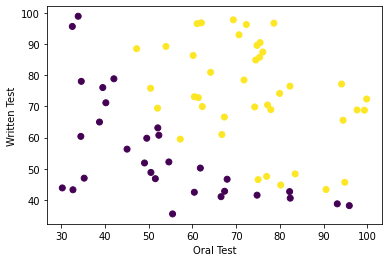

In [16]:
model = Model(df, test_size=0.3)
model.plot_train()

In [17]:
model.logistic_regression()

Training Accuracy:  0.8714285714285714
Test Accuracy:  0.9333333333333333


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


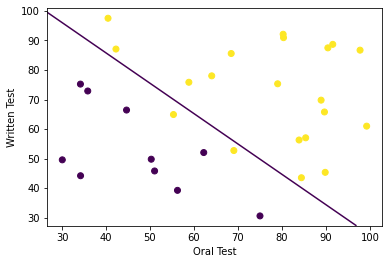

In [19]:
model.descion_plot()
plt.xlabel('Oral Test')
plt.ylabel('Written Test')
plt.show()